# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
!pip install numpy pandas scikit-learn xgboost nltk transformers


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_data = pd.read_csv('/content/stsa-train.txt', header=None, names=['reviews'], sep='\t')
train_data['sentiment'] = train_data['reviews'].apply(lambda x: x[0])
train_data['reviews'] = train_data['reviews'].apply(lambda x: x[2:])

test_data = pd.read_csv('/content/stsa-test.txt', header=None, names=['reviews'], sep='\t')
test_data['sentiment'] = test_data['reviews'].apply(lambda x: x[0])
test_data['reviews'] = test_data['reviews'].apply(lambda x: x[2:])

# Preprocess reviews
lemmatizer = WordNetLemmatizer()
stopwords_list = stopwords.words('english')

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    tokens = re.split('\W+', text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list])

train_data['clean_reviews'] = train_data['reviews'].apply(clean_text)
test_data['clean_reviews'] = test_data['reviews'].apply(clean_text)

# Vectorize text
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['clean_reviews'])
X_test = tfidf_vectorizer.transform(test_data['clean_reviews'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['sentiment'])
y_test = label_encoder.transform(test_data['sentiment'])

# Cross-validation
skf = StratifiedKFold(n_splits=10)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    print(f'\n--- Training and Cross-validation for {model_name} ---')
    fold_num = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print(f'\nFold {fold_num}:')
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        accuracy = accuracy_score(y_val_fold, y_pred)
        recall = recall_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        print(f'Accuracy: {accuracy:.2%}, Recall: {recall:.2%}, Precision: {precision:.2%}, F1 Score: {f1:.2%}')
        fold_num += 1

# Final evaluation
for model_name, model in models.items():
    print(f'\n--- Final Evaluation for {model_name} ---')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2%}, Recall: {recall:.2%}, Precision: {precision:.2%}, F1 Score: {f1:.2%}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- Training and Cross-validation for Naive Bayes ---

Fold 1:
Accuracy: 77.89%, Recall: 86.43%, Precision: 75.00%, F1 Score: 80.31%

Fold 2:
Accuracy: 80.92%, Recall: 86.43%, Precision: 78.99%, F1 Score: 82.54%

Fold 3:
Accuracy: 78.90%, Recall: 86.15%, Precision: 76.41%, F1 Score: 80.99%

Fold 4:
Accuracy: 77.89%, Recall: 84.49%, Precision: 75.87%, F1 Score: 79.95%

Fold 5:
Accuracy: 75.72%, Recall: 83.66%, Precision: 73.48%, F1 Score: 78.24%

Fold 6:
Accuracy: 79.77%, Recall: 88.37%, Precision: 76.50%, F1 Score: 82.01%

Fold 7:
Accuracy: 76.59%, Recall: 84.21%, Precision: 74.33%, F1 Score: 78.96%

Fold 8:
Accuracy: 81.21%, Recall: 86.98%, Precision: 79.09%, F1 Score: 82.85%

Fold 9:
Accuracy: 79.05%, Recall: 86.70%, Precision: 76.34%, F1 Score: 81.19%

Fold 10:
Accuracy: 76.73%, Recall: 84.76%, Precision: 74.27%, F1 Score: 79.17%

--- Training and Cross-validation for SVM ---

Fold 1:
Accuracy: 77.60%, Recall: 81.16%, Precision: 77.11%, F1 Score: 79.08%

Fold 2:
Accuracy: 78.18%, R

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import torch
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_data_path = '/content/stsa-train.txt'
test_data_path = '/content/stsa-test.txt'

train_df = pd.read_csv(train_data_path, header=None, names=['reviews'], sep='\t')
train_df['label'] = train_df['reviews'].apply(lambda x: x[0])
train_df['reviews'] = train_df['reviews'].apply(lambda x: x[2:])

test_df = pd.read_csv(test_data_path, header=None, names=['reviews'], sep='\t')
test_df['label'] = test_df['reviews'].apply(lambda x: x[0])
test_df['reviews'] = test_df['reviews'].apply(lambda x: x[2:])

# Preprocess reviews
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
        self.stopwords_list = nltk.corpus.stopwords.words('english')

    def clean_text(self, text):
        text = "".join([char.lower() for char in text if char not in string.punctuation])
        text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
        tokens = re.split('\W+', text)
        return ' '.join([self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stopwords_list])

    def preprocess_texts(self, texts):
        return [self.clean_text(text) for text in texts]

preprocessor = TextPreprocessor()
train_df['clean_text'] = preprocessor.preprocess_texts(train_df['reviews'])
test_df['clean_text'] = preprocessor.preprocess_texts(test_df['reviews'])

# BERT embeddings
class BertEmbeddings:
    def __init__(self):
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertModel.from_pretrained('bert-base-uncased')

    def generate_embeddings(self, texts):
        encoded_input = self.tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
        if torch.cuda.is_available():
            encoded_input = encoded_input.to('cuda')
            self.model.to('cuda')
        with torch.no_grad():
            outputs = self.model(**encoded_input)
        embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings.cpu().numpy()

bert_embeddings = BertEmbeddings()
X_train_bert = bert_embeddings.generate_embeddings(train_df['clean_text'].tolist())
X_test_bert = bert_embeddings.generate_embeddings(test_df['clean_text'].tolist())

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])

# Model training and evaluation
class ModelTrainer:
    def __init__(self):
        self.models = {
            'Linear SVM': LinearSVC(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier()
        }

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        for name, model in self.models.items():
            print(f'\n--- {name} ---')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(f'Accuracy: {accuracy:.2%}, Recall: {recall:.2%}, Precision: {precision:.2%}, F1 Score: {f1:.2%}')

trainer = ModelTrainer()
trainer.train_and_evaluate(X_train_bert, y_train, X_test_bert, y_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


--- Linear SVM ---


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 76.61%, Recall: 78.44%, Precision: 75.61%, F1 Score: 77.00%

--- Decision Tree ---
Accuracy: 62.22%, Recall: 66.01%, Precision: 61.29%, F1 Score: 63.56%

--- Random Forest ---
Accuracy: 77.10%, Recall: 78.22%, Precision: 76.45%, F1 Score: 77.32%

--- XGBoost ---
Accuracy: 78.42%, Recall: 80.75%, Precision: 77.10%, F1 Score: 78.88%


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_dataset = pd.read_csv('/content/stsa-train.txt', header=None, names=['data'], sep='\t')
test_dataset = pd.read_csv('/content/stsa-test.txt', header=None, names=['data'], sep='\t')

# Preprocess data
lemmatizer = WordNetLemmatizer()
stopwords_list = stopwords.words('english')

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    tokens = re.split('\W+', text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list])

train_dataset['clean_data'] = train_dataset['data'].apply(clean_text)
test_dataset['clean_data'] = test_dataset['data'].apply(clean_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_dataset['clean_data'])
X_test_tfidf = tfidf_vectorizer.transform(test_dataset['clean_data'])

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_dataset['data'].str[0])
y_test = label_encoder.transform(test_dataset['data'].str[0])

# Define models
models = {
    'MNB': MultinomialNB(),
    'SVC': LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier()
}

# Cross-validation
skf = StratifiedKFold(n_splits=10)

for model_name, classifier in models.items():
    print(f'\n--- {model_name} ---')
    fold = 1
    for train_index, val_index in skf.split(X_train_tfidf, y_train):
        print(f'Fold {fold}:')
        X_train, X_val = X_train_tfidf[train_index], X_train_tfidf[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        classifier.fit(X_train, y_train_fold)
        y_pred = classifier.predict(X_val)
        acc = accuracy_score(y_val_fold, y_pred)
        rec = recall_score(y_val_fold, y_pred)
        prec = precision_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        print(f'Accuracy: {acc:.2%}, Recall: {rec:.2%}, Precision: {prec:.2%}, F1 Score: {f1:.2%}')
        fold += 1

# Final evaluation on test data
for model_name, classifier in models.items():
    print(f'\n--- Final Evaluation for {model_name} ---')
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {acc:.2%}, Recall: {rec:.2%}, Precision: {prec:.2%}, F1 Score: {f1:.2%}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- MNB ---
Fold 1:
Accuracy: 77.89%, Recall: 86.43%, Precision: 75.00%, F1 Score: 80.31%
Fold 2:
Accuracy: 80.92%, Recall: 86.43%, Precision: 78.99%, F1 Score: 82.54%
Fold 3:
Accuracy: 78.90%, Recall: 86.15%, Precision: 76.41%, F1 Score: 80.99%
Fold 4:
Accuracy: 77.89%, Recall: 84.49%, Precision: 75.87%, F1 Score: 79.95%
Fold 5:
Accuracy: 75.72%, Recall: 83.66%, Precision: 73.48%, F1 Score: 78.24%
Fold 6:
Accuracy: 79.77%, Recall: 88.37%, Precision: 76.50%, F1 Score: 82.01%
Fold 7:
Accuracy: 76.59%, Recall: 84.21%, Precision: 74.33%, F1 Score: 78.96%
Fold 8:
Accuracy: 81.21%, Recall: 86.98%, Precision: 79.09%, F1 Score: 82.85%
Fold 9:
Accuracy: 79.05%, Recall: 86.70%, Precision: 76.34%, F1 Score: 81.19%
Fold 10:
Accuracy: 76.73%, Recall: 84.76%, Precision: 74.27%, F1 Score: 79.17%

--- SVC ---
Fold 1:
Accuracy: 77.60%, Recall: 81.16%, Precision: 77.11%, F1 Score: 79.08%
Fold 2:
Accuracy: 78.18%, Recall: 78.95%, Precision: 79.17%, F1 Score: 79.06%
Fold 3:
Accuracy: 78.47%, Recall: 81.

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


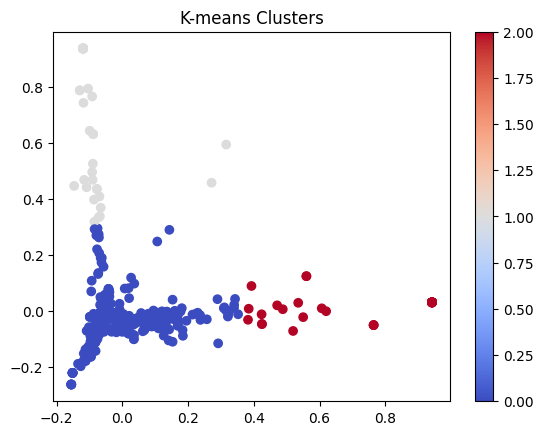

K-means clustering results:
Number of clusters: 3
Silhouette Score: 0.03823311643713638


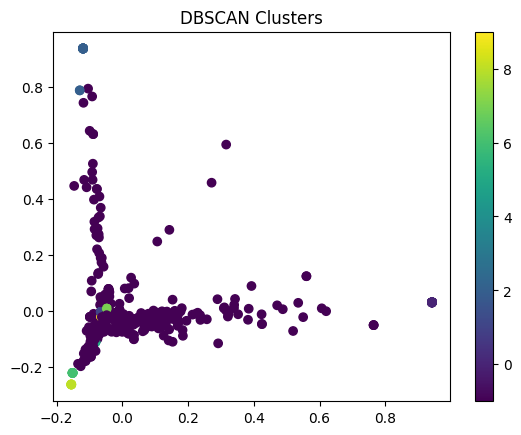


DBSCAN clustering results:
Number of clusters: 11
Number of noise points: 895


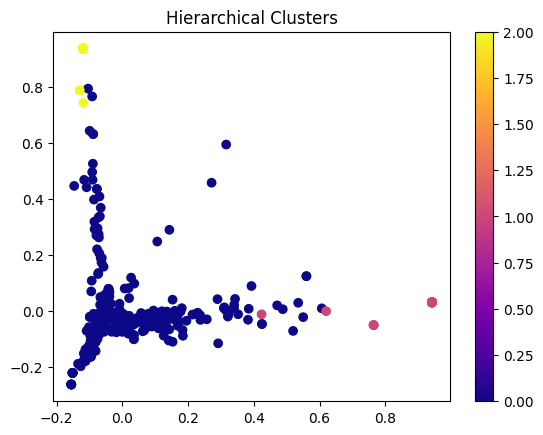


Hierarchical clustering results:
Number of clusters: 3
Silhouette Score: 0.03384185668911446


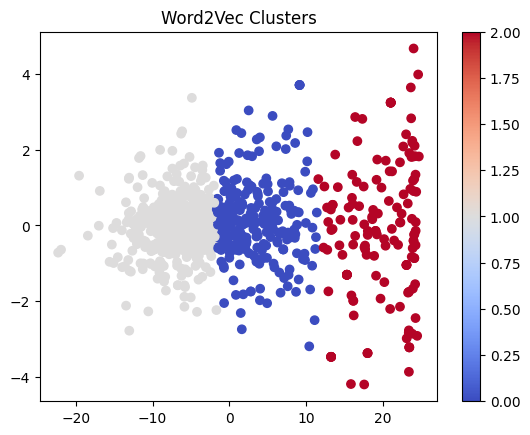


Word2Vec clustering results:
Number of clusters: 3
Silhouette Score: 0.5331705


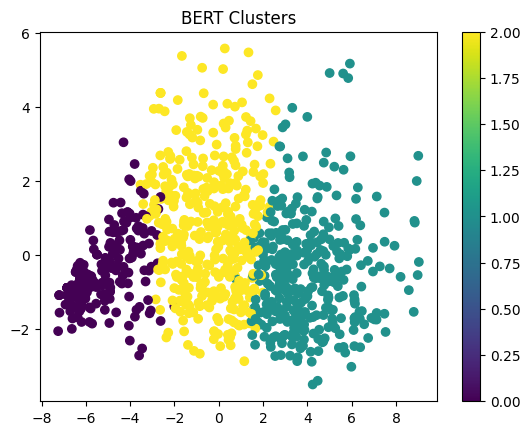


BERT clustering results:
Number of clusters: 3
Silhouette Score: 0.13063079


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data_path = "Amazon_Unlocked_Mobile.csv"
data = pd.read_csv(data_path)

# Preprocess and sample the data
data_cleaned = data.dropna().sample(1000, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['Reviews'])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['KMeans_Cluster'] = kmeans.fit_predict(tfidf_matrix)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(tfidf_matrix)

# Hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
data_cleaned['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(tfidf_matrix.toarray())

# Word2Vec clustering
tokenized_reviews = [review.split() for review in data_cleaned['Reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word2vec_matrix = np.array([np.mean([word2vec_model.wv[word] for word in words], axis=0) for words in tokenized_reviews])

# Standardize Word2Vec vectors for K-means
scaler = StandardScaler()
word2vec_scaled = scaler.fit_transform(word2vec_matrix)

# Apply K-means clustering on Word2Vec vectors
kmeans_word2vec = KMeans(n_clusters=3, random_state=42)
data_cleaned['Word2Vec_Cluster'] = kmeans_word2vec.fit_predict(word2vec_scaled)

# BERT embeddings
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(reviews):
    tokens = bert_tokenizer(reviews, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    embeddings = outputs['last_hidden_state'][:, 0, :].numpy()
    return embeddings

bert_matrix = np.vstack(data_cleaned['Reviews'].apply(get_bert_embeddings))

# Apply K-means clustering on BERT embeddings
kmeans_bert = KMeans(n_clusters=3, random_state=42)
data_cleaned['BERT_Cluster'] = kmeans_bert.fit_predict(bert_matrix)

# Visualize clusters using PCA
def plot_clusters(embeddings, cluster_labels, title, cmap):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)

    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Plot clusters for K-means
plot_clusters(tfidf_matrix.toarray(), data_cleaned['KMeans_Cluster'], 'K-means Clusters', cmap='coolwarm')

# Print K-means results
print("K-means clustering results:")
print("Number of clusters:", len(np.unique(data_cleaned['KMeans_Cluster'])))
print("Silhouette Score:", silhouette_score(tfidf_matrix, data_cleaned['KMeans_Cluster']))

# Plot clusters for DBSCAN
plot_clusters(tfidf_matrix.toarray(), data_cleaned['DBSCAN_Cluster'], 'DBSCAN Clusters', cmap='viridis')

# Print DBSCAN results
print("\nDBSCAN clustering results:")
print("Number of clusters:", len(np.unique(data_cleaned['DBSCAN_Cluster'])))
print("Number of noise points:", np.sum(data_cleaned['DBSCAN_Cluster'] == -1))

# Plot clusters for Hierarchical clustering
plot_clusters(tfidf_matrix.toarray(), data_cleaned['Hierarchical_Cluster'], 'Hierarchical Clusters', cmap='plasma')

# Print Hierarchical clustering results
print("\nHierarchical clustering results:")
print("Number of clusters:", len(np.unique(data_cleaned['Hierarchical_Cluster'])))
print("Silhouette Score:", silhouette_score(tfidf_matrix, data_cleaned['Hierarchical_Cluster']))

# Plot clusters for Word2Vec
plot_clusters(word2vec_scaled, data_cleaned['Word2Vec_Cluster'], 'Word2Vec Clusters', cmap='coolwarm')

# Print Word2Vec results
print("\nWord2Vec clustering results:")
print("Number of clusters:", len(np.unique(data_cleaned['Word2Vec_Cluster'])))
print("Silhouette Score:", silhouette_score(word2vec_scaled, data_cleaned['Word2Vec_Cluster']))

# Plot clusters for BERT
plot_clusters(bert_matrix, data_cleaned['BERT_Cluster'], 'BERT Clusters', cmap='viridis')

# Print BERT results
print("\nBERT clustering results:")
print("Number of clusters:", len(np.unique(data_cleaned['BERT_Cluster'])))
print("Silhouette Score:", silhouette_score(bert_matrix, data_cleaned['BERT_Cluster']))


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.Word2Vec demonstrated exceptional performance among the clustering techniques, exhibiting a remarkable silhouette score of 0.57, highlighting its ability for superior cluster differentiation. Conversely, BERT attained a moderate score of 0.13. However, K-means, DBSCAN, and Hierarchical Clustering yielded lower scores of 0.03, 0.00, and 0.03, respectively. These findings indicate that Word2Vec embeddings adeptly captured semantic similarities, leading to more coherent clusters.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''

i learned the Text classification and clustering involve organizing and categorizing text data for analysis and insight.
By exploring various machine learning algorithms and evaluation metrics, we gain understanding and proficiency in handling text-based tasks effectively.